In [38]:
import pandas as pd
df = pd.DataFrame({
    '제품': ['노트북', '태블릿', '스마트폰', '노트북', '스마트폰', '태블릿'],
    '지역': ['서울', '부산', '서울', '대구', '부산', '서울'],
    '판매량': [10, 5, 8, 12, 6, 4],
    '가격': [1200000, 500000, 800000, 1300000, 750000, 550000],
    '판매자번호': ['A01', 'A02', 'A01', 'A03', 'A02', 'A03']
})
df

,제품,지역,판매량,가격,판매자번호
0,노트북,서울,10,1200000,A01
1,태블릿,부산,5,500000,A02
2,스마트폰,서울,8,800000,A01
3,노트북,대구,12,1300000,A03
4,스마트폰,부산,6,750000,A02
5,태블릿,서울,4,550000,A03


In [40]:
# 제품별 평균 판매량
df.groupby('제품')[['판매량']].mean()

,판매량
제품,
노트북,11.0
스마트폰,7.0
태블릿,4.5


In [42]:
df.groupby('지역')[['판매량']].sum()

,판매량
지역,
대구,12
부산,11
서울,22


In [44]:
# 판매자별 총 매출액
df['매출액'] = df['판매량'] * df['가격']

In [46]:
df

,제품,지역,판매량,가격,판매자번호,매출액
0,노트북,서울,10,1200000,A01,12000000
1,태블릿,부산,5,500000,A02,2500000
2,스마트폰,서울,8,800000,A01,6400000
3,노트북,대구,12,1300000,A03,15600000
4,스마트폰,부산,6,750000,A02,4500000
5,태블릿,서울,4,550000,A03,2200000


In [48]:
df.groupby('판매자번호')[['매출액']].sum()

,매출액
판매자번호,
A01,18400000
A02,7000000
A03,17800000


In [52]:
# 집계함수
df.groupby('제품').agg({
    '판매량':['sum','mean','count'],
    '가격':['min','max','sum']
})

판매량                   가격                  
     sum  mean count      min      max      sum
제품                                             
노트북   22  11.0     2  1200000  1300000  2500000
스마트폰  14   7.0     2   750000   800000  1550000
태블릿    9   4.5     2   500000   550000  1050000

In [67]:
df.groupby('제품').agg({
    '판매량':'mean'
})

,판매량
제품,
노트북,11.0
스마트폰,7.0
태블릿,4.5


In [69]:
df.groupby('제품').sum() # sum: 문자열끼리는 합쳐주고, 숫자를 더하기를 통한 합산 계산

,지역,판매량,가격,판매자번호,매출액
제품,,,,,
노트북,서울대구,22,2500000,A01A03,27600000
스마트폰,서울부산,14,1550000,A01A02,10900000
태블릿,부산서울,9,1050000,A02A03,4700000


In [75]:
df.groupby('지역').count()

,제품,판매량,가격,판매자번호,매출액
지역,,,,,
대구,1,1,1,1,1
부산,2,2,2,2,2
서울,3,3,3,3,3


In [77]:
def range_calc(x):
    return x.max() -x.min()

df.groupby('제품').agg({
    '가격':['mean',range_calc],
    '판매량':'sum'
})

가격            판매량
           mean range_calc sum
제품                            
노트북   1250000.0     100000  22
스마트폰   775000.0      50000  14
태블릿    525000.0      50000   9

In [79]:
data = {
    '번호': [100, 101, 102, 103, 104, 105, 106],
    '성명': ['김민재', '이강인', '박찬호', '차범근', '축신수', '손흥민', '황희찬'],
    '나이': [27, 22, 50, 60, 40, 30, 28],
    '몸무게': [75, 75, 82, 80, 90, 69, 68],
    '급여': [54280000, 34280000, 84280000, 50000000, 70000000, 70280000, 25280000],
    '종목': ['축구', '축구', '야구', '야구', '축구', '축구', '축구']
}
df = pd.DataFrame(data)
df

,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75,54280000,축구
1,101,이강인,22,75,34280000,축구
2,102,박찬호,50,82,84280000,야구
3,103,차범근,60,80,50000000,야구
4,104,축신수,40,90,70000000,축구
5,105,손흥민,30,69,70280000,축구
6,106,황희찬,28,68,25280000,축구


In [81]:
df['급여'].max()  # 최대값

84280000

In [83]:
df['급여'].min()  # 최소값

25280000

In [85]:
df['급여'].sum()   # 합계값

388400000

In [87]:
df['급여'].mean()   # 평균값

55485714.28571428

In [91]:
df['급여'].median() # 중앙값

54280000.0

In [93]:
df['종목'].mode() # 최빈값(빈도가 가장 많은 값)

0    축구
Name: 종목, dtype: object

In [97]:
df['종목'].count() # 데이터 개수

7

In [101]:
df['종목'].value_counts()  # 각 데이터별 값들의 개수

종목
축구    5
야구    2
Name: count, dtype: int64

In [103]:
df['급여'].agg('mean')

55485714.28571428

In [107]:
df.groupby('종목').count()

,번호,성명,나이,몸무게,급여
종목,,,,,
야구,2,2,2,2,2
축구,5,5,5,5,5


In [113]:
df['급여'].describe()

count    7.000000e+00
mean     5.548571e+07
std      2.102483e+07
min      2.528000e+07
25%      4.214000e+07
50%      5.428000e+07
75%      7.014000e+07
max      8.428000e+07
Name: 급여, dtype: float64

In [119]:
df.describe()

,번호,나이,몸무게,급여
count,7.000000,7.000000,7.000000,7.000000e+00
mean,103.000000,36.714286,77.000000,5.548571e+07
std,2.160247,13.912995,7.702813,2.102483e+07
min,100.000000,22.000000,68.000000,2.528000e+07
25%,101.500000,27.500000,72.000000,4.214000e+07
50%,103.000000,30.000000,75.000000,5.428000e+07
75%,104.500000,45.000000,81.000000,7.014000e+07
max,106.000000,60.000000,90.000000,8.428000e+07


In [123]:
df.groupby('종목')[['나이','급여']].mean()

,나이,급여
종목,,
야구,55.0,67140000.0
축구,29.4,50824000.0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      7 non-null      int64 
 1   성명      7 non-null      object
 2   나이      7 non-null      int64 
 3   몸무게     7 non-null      int64 
 4   급여      7 non-null      int64 
 5   종목      7 non-null      object
dtypes: int64(4), object(2)
memory usage: 468.0+ bytes


In [129]:
df['몸무게'] = df['몸무게'].astype(str)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      7 non-null      int64 
 1   성명      7 non-null      object
 2   나이      7 non-null      int64 
 3   몸무게     7 non-null      object
 4   급여      7 non-null      int64 
 5   종목      7 non-null      object
dtypes: int64(3), object(3)
memory usage: 468.0+ bytes


In [133]:
df['몸무게'] = df['몸무게'].astype("Int64")

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      7 non-null      int64 
 1   성명      7 non-null      object
 2   나이      7 non-null      int64 
 3   몸무게     7 non-null      Int64 
 4   급여      7 non-null      int64 
 5   종목      7 non-null      object
dtypes: Int64(1), int64(3), object(2)
memory usage: 475.0+ bytes


### 데이터 정제
* 잘못된 데이터를 수정하는 것
* 잘못된 데이터 유형
    * 빈 셀 (Empty cells)
    * 잘못된 값(wrong data): 극단치(Outlier)
    * 잘못된 형식의 데이터(Wrong format data)
    * 중복 입력된 데이터(Duplicate data)

In [141]:
df

,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75,54280000,축구
1,101,이강인,22,75,34280000,축구
2,102,박찬호,50,82,84280000,야구
3,103,차범근,60,80,50000000,야구
4,104,축신수,40,90,70000000,축구
5,105,손흥민,30,69,70280000,축구
6,106,황희찬,28,68,25280000,축구


In [160]:
df.loc[df['몸무게'] >= 80, '몸무게'] = None
df

,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75,54280000,축구
1,101,이강인,22,75,34280000,축구
2,102,박찬호,50,<NA>,84280000,야구
3,103,차범근,60,<NA>,50000000,야구
4,104,축신수,40,<NA>,70000000,축구
5,105,손흥민,30,69,70280000,축구
6,106,황희찬,28,68,25280000,축구


In [162]:
df2 = df.dropna() # 행 기본값, how = 'any' 결측치가 하나라도 있으면 그 행은 삭제를 한다
df2

,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75,54280000,축구
1,101,이강인,22,75,34280000,축구
5,105,손흥민,30,69,70280000,축구
6,106,황희찬,28,68,25280000,축구


### .fillna(): 빈 셀을 새로운 값으로 바꾸어 준다

In [168]:
df['몸무게'].fillna(80, inplace = True)
df

C:\Users\sj606\AppData\Local\Temp\ipykernel_7868\3686732723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['몸무게'].fillna(80, inplace = True)


,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75,54280000,축구
1,101,이강인,22,75,34280000,축구
2,102,박찬호,50,80,84280000,야구
3,103,차범근,60,80,50000000,야구
4,104,축신수,40,80,70000000,축구
5,105,손흥민,30,69,70280000,축구
6,106,황희찬,28,68,25280000,축구


In [170]:
df.loc[df['몸무게'] >= 80, '몸무게'] = None
df

,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75,54280000,축구
1,101,이강인,22,75,34280000,축구
2,102,박찬호,50,<NA>,84280000,야구
3,103,차범근,60,<NA>,50000000,야구
4,104,축신수,40,<NA>,70000000,축구
5,105,손흥민,30,69,70280000,축구
6,106,황희찬,28,68,25280000,축구


In [172]:
avg = df['몸무게'].mean()
avg

71.75

In [186]:
df['몸무게'] = df['몸무게'].astype(float)

In [188]:
# df['몸무게'].fillna(80, inplace = True) # 비추천(원본 변경)
df['몸무게'] = df['몸무게'].fillna(avg)   # 권장 (원본 변경)

In [190]:
df

,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75.00,54280000,축구
1,101,이강인,22,75.00,34280000,축구
2,102,박찬호,50,71.75,84280000,야구
3,103,차범근,60,71.75,50000000,야구
4,104,축신수,40,71.75,70000000,축구
5,105,손흥민,30,69.00,70280000,축구
6,106,황희찬,28,68.00,25280000,축구


In [192]:
df['몸무게'] = df['몸무게'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      7 non-null      int64 
 1   성명      7 non-null      object
 2   나이      7 non-null      int64 
 3   몸무게     7 non-null      int32 
 4   급여      7 non-null      int64 
 5   종목      7 non-null      object
dtypes: int32(1), int64(3), object(2)
memory usage: 440.0+ bytes


In [194]:
df.loc[2,'나이'] = 500

In [196]:
df

,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75,54280000,축구
1,101,이강인,22,75,34280000,축구
2,102,박찬호,500,71,84280000,야구
3,103,차범근,60,71,50000000,야구
4,104,축신수,40,71,70000000,축구
5,105,손흥민,30,69,70280000,축구
6,106,황희찬,28,68,25280000,축구


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      7 non-null      int64 
 1   성명      7 non-null      object
 2   나이      7 non-null      int64 
 3   몸무게     7 non-null      int32 
 4   급여      7 non-null      int64 
 5   종목      7 non-null      object
dtypes: int32(1), int64(3), object(2)
memory usage: 440.0+ bytes


In [200]:
df.describe()

,번호,나이,몸무게,급여
count,7.000000,7.000000,7.000000,7.000000e+00
mean,103.000000,101.000000,71.428571,5.548571e+07
std,2.160247,176.394444,2.699206,2.102483e+07
min,100.000000,22.000000,68.000000,2.528000e+07
25%,101.500000,27.500000,70.000000,4.214000e+07
50%,103.000000,30.000000,71.000000,5.428000e+07
75%,104.500000,50.000000,73.000000,7.014000e+07
max,106.000000,500.000000,75.000000,8.428000e+07


In [204]:
df.loc[2,'나이'] = 50
df

,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75,54280000,축구
1,101,이강인,22,75,34280000,축구
2,102,박찬호,50,71,84280000,야구
3,103,차범근,60,71,50000000,야구
4,104,축신수,40,71,70000000,축구
5,105,손흥민,30,69,70280000,축구
6,106,황희찬,28,68,25280000,축구


In [396]:
import pandas as pd
df = pd.read_csv('pandas_clean.csv',encoding="CP949")
df

,이름,나이,몸무게,생년월일,급여
0,김철수,25.0,75.0,20000101,3500000
1,이영희,30.0,55.0,1994-05-15,100000
2,박민수,500.0,68.0,1993-08-22,4200000
3,정미영,28.0,NaN,1996-02-28,3800000
4,강지아,NaN,52.0,1998-11-30,3600000
5,최현우,35.0,80.0,1989-07-12,5000000
6,송은지,29.0,58.0,1995-03-18,3900000
7,송은지,29.0,58.0,1995-03-18,3900000


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      8 non-null      object 
 1   나이      7 non-null      float64
 2   몸무게     7 non-null      float64
 3   생년월일    8 non-null      object 
 4   급여      8 non-null      int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 452.0+ bytes


In [400]:
df.loc[2,'나이'] = 31

In [402]:
df['나이'] = df['나이'].astype('Int64')

In [404]:
df.loc[4,'나이'] = 26

In [405]:
df['몸무게'].mean()

63.714285714285715

In [407]:
df.loc[3,'몸무게'] = 63

In [409]:
df

,이름,나이,몸무게,생년월일,급여
0,김철수,25,75.0,20000101,3500000
1,이영희,30,55.0,1994-05-15,100000
2,박민수,31,68.0,1993-08-22,4200000
3,정미영,28,63.0,1996-02-28,3800000
4,강지아,26,52.0,1998-11-30,3600000
5,최현우,35,80.0,1989-07-12,5000000
6,송은지,29,58.0,1995-03-18,3900000
7,송은지,29,58.0,1995-03-18,3900000


In [410]:
df.loc[0,'생년월일'] = "2000-01-01"

In [411]:
df

,이름,나이,몸무게,생년월일,급여
0,김철수,25,75.0,2000-01-01,3500000
1,이영희,30,55.0,1994-05-15,100000
2,박민수,31,68.0,1993-08-22,4200000
3,정미영,28,63.0,1996-02-28,3800000
4,강지아,26,52.0,1998-11-30,3600000
5,최현우,35,80.0,1989-07-12,5000000
6,송은지,29,58.0,1995-03-18,3900000
7,송은지,29,58.0,1995-03-18,3900000


In [413]:
df.loc[0,'나이'] = 24

In [414]:
df

,이름,나이,몸무게,생년월일,급여
0,김철수,24,75.0,2000-01-01,3500000
1,이영희,30,55.0,1994-05-15,100000
2,박민수,31,68.0,1993-08-22,4200000
3,정미영,28,63.0,1996-02-28,3800000
4,강지아,26,52.0,1998-11-30,3600000
5,최현우,35,80.0,1989-07-12,5000000
6,송은지,29,58.0,1995-03-18,3900000
7,송은지,29,58.0,1995-03-18,3900000


In [415]:
df.loc[df['급여'] <= 200000, '급여'] = None

In [416]:
df

,이름,나이,몸무게,생년월일,급여
0,김철수,24,75.0,2000-01-01,3500000.0
1,이영희,30,55.0,1994-05-15,NaN
2,박민수,31,68.0,1993-08-22,4200000.0
3,정미영,28,63.0,1996-02-28,3800000.0
4,강지아,26,52.0,1998-11-30,3600000.0
5,최현우,35,80.0,1989-07-12,5000000.0
6,송은지,29,58.0,1995-03-18,3900000.0
7,송은지,29,58.0,1995-03-18,3900000.0


In [418]:
df['급여'].mean()

3985714.285714286

In [421]:
df.loc[1,'급여'] = 3985714

In [422]:
df

,이름,나이,몸무게,생년월일,급여
0,김철수,24,75.0,2000-01-01,3500000.0
1,이영희,30,55.0,1994-05-15,3985714.0
2,박민수,31,68.0,1993-08-22,4200000.0
3,정미영,28,63.0,1996-02-28,3800000.0
4,강지아,26,52.0,1998-11-30,3600000.0
5,최현우,35,80.0,1989-07-12,5000000.0
6,송은지,29,58.0,1995-03-18,3900000.0
7,송은지,29,58.0,1995-03-18,3900000.0


In [425]:
df = df.drop(index = [7])

In [426]:
df

,이름,나이,몸무게,생년월일,급여
0,김철수,24,75.0,2000-01-01,3500000.0
1,이영희,30,55.0,1994-05-15,3985714.0
2,박민수,31,68.0,1993-08-22,4200000.0
3,정미영,28,63.0,1996-02-28,3800000.0
4,강지아,26,52.0,1998-11-30,3600000.0
5,최현우,35,80.0,1989-07-12,5000000.0
6,송은지,29,58.0,1995-03-18,3900000.0


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      7 non-null      object 
 1   나이      7 non-null      Int64  
 2   몸무게     7 non-null      float64
 3   생년월일    7 non-null      object 
 4   급여      7 non-null      float64
dtypes: Int64(1), float64(2), object(2)
memory usage: 419.0+ bytes


In [430]:
from datetime import datetime

# to_datetime
df['생년월일'] = pd.to_datetime(df['생년월일'])

In [432]:
df

,이름,나이,몸무게,생년월일,급여
0,김철수,24,75.0,2000-01-01,3500000.0
1,이영희,30,55.0,1994-05-15,3985714.0
2,박민수,31,68.0,1993-08-22,4200000.0
3,정미영,28,63.0,1996-02-28,3800000.0
4,강지아,26,52.0,1998-11-30,3600000.0
5,최현우,35,80.0,1989-07-12,5000000.0
6,송은지,29,58.0,1995-03-18,3900000.0


In [433]:
pd.to_datetime = pd.datetime(df['생년월일'].str.replace('-',''),format="%Y%m%d")

AttributeError: module 'pandas' has no attribute 'datetime'

In [ ]:
df.info()

- [컬럼에서 날짜 정보 추출]
    *df['생년월일'].dt.year
    *df['생년월일'].dt.month
    *df['생년월일'].dt.day
- datetime()함수에서 날짜정보 추출
    -datetime.now().year
    -datetime.now().month
    -datetime.now().day
    -datetime.now().hour

In [ ]:
df['실제나이'] = df['생년월일'].dt.year
df

In [436]:
df['실제나이'] = datetime.now().year - df['생년월일'].dt.year
df

,이름,나이,몸무게,생년월일,급여,실제나이
0,김철수,24,75.0,2000-01-01,3500000.0,24
1,이영희,30,55.0,1994-05-15,3985714.0,30
2,박민수,31,68.0,1993-08-22,4200000.0,31
3,정미영,28,63.0,1996-02-28,3800000.0,28
4,강지아,26,52.0,1998-11-30,3600000.0,26
5,최현우,35,80.0,1989-07-12,5000000.0,35
6,송은지,29,58.0,1995-03-18,3900000.0,29


### duplicated(): 중복된 각 행에 대해 부울 값 True와 False를 보여준다

In [439]:
df.duplicated()  # 중복된것을 True로 출력함

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [441]:
df[df.duplicated()]

,이름,나이,몸무게,생년월일,급여,실제나이


### .drop_duplicates() 매서드: 중복된 행을 바로 삭제 (원본 삭제 안됨)

In [443]:
df2 = df.drop_duplicates()
df2

,이름,나이,몸무게,생년월일,급여,실제나이
0,김철수,24,75.0,2000-01-01,3500000.0,24
1,이영희,30,55.0,1994-05-15,3985714.0,30
2,박민수,31,68.0,1993-08-22,4200000.0,31
3,정미영,28,63.0,1996-02-28,3800000.0,28
4,강지아,26,52.0,1998-11-30,3600000.0,26
5,최현우,35,80.0,1989-07-12,5000000.0,35
6,송은지,29,58.0,1995-03-18,3900000.0,29


In [448]:
# 특정 컬럼을 일반 숫자 형식으로 변환(소수점 두 자리{:,.02f})
df['몸무게'] = df['몸무게'].apply(lambda x: '{:.02f}'.format(x))
df

,이름,나이,몸무게,생년월일,급여,실제나이
0,김철수,24,75.00,2000-01-01,3500000.0,24
1,이영희,30,55.00,1994-05-15,3985714.0,30
2,박민수,31,68.00,1993-08-22,4200000.0,31
3,정미영,28,63.00,1996-02-28,3800000.0,28
4,강지아,26,52.00,1998-11-30,3600000.0,26
5,최현우,35,80.00,1989-07-12,5000000.0,35
6,송은지,29,58.00,1995-03-18,3900000.0,29


In [476]:
#df.loc[:,'몸무게'] = df['몸무게'].apply(lambda x: '{:.02f}'.format(x))

In [480]:
df['급여'] = df['급여'].apply(lambda x: '{:.0f}'.format(x))


In [482]:
df2 = df.drop('나이',axis=1)
df2

,이름,몸무게,생년월일,급여,실제나이
0,김철수,75.00,2000-01-01,3500000,24
1,이영희,55.00,1994-05-15,3985714,30
2,박민수,68.00,1993-08-22,4200000,31
3,정미영,63.00,1996-02-28,3800000,28
4,강지아,52.00,1998-11-30,3600000,26
5,최현우,80.00,1989-07-12,5000000,35
6,송은지,58.00,1995-03-18,3900000,29


In [655]:
import pandas as pd
df = pd.read_csv('pandas_clean2.csv',encoding="CP949")
df

,이름,나이,몸무게,생년월일,급여
0,홍길동,28.0,70.0,19960415,3200000
1,김영수,32.0,63.0,1992-03-21,150000
2,이미라,450.0,75.0,1991-09-15,4500000
3,박준호,27.0,NaN,1997-11-08,3600000
4,최서연,NaN,48.0,1995-07-25,3400000
5,정태민,31.0,82.0,1993-04-30,4800000
6,백지원,26.0,54.0,1998-08-12,3300000
7,백지원,26.0,54.0,1998-08-12,3300000


In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      8 non-null      object 
 1   나이      7 non-null      float64
 2   몸무게     7 non-null      float64
 3   생년월일    8 non-null      object 
 4   급여      8 non-null      int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 452.0+ bytes


In [659]:
df.loc[0,'생년월일'] = '1996-04-15'

In [661]:
df

,이름,나이,몸무게,생년월일,급여
0,홍길동,28.0,70.0,1996-04-15,3200000
1,김영수,32.0,63.0,1992-03-21,150000
2,이미라,450.0,75.0,1991-09-15,4500000
3,박준호,27.0,NaN,1997-11-08,3600000
4,최서연,NaN,48.0,1995-07-25,3400000
5,정태민,31.0,82.0,1993-04-30,4800000
6,백지원,26.0,54.0,1998-08-12,3300000
7,백지원,26.0,54.0,1998-08-12,3300000


In [663]:
from datetime import datetime
df['생년월일'] = pd.to_datetime(df['생년월일'])

In [665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   이름      8 non-null      object        
 1   나이      7 non-null      float64       
 2   몸무게     7 non-null      float64       
 3   생년월일    8 non-null      datetime64[ns]
 4   급여      8 non-null      int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 452.0+ bytes


In [667]:
df['실제나이'] = df['실제나이'] = datetime.now().year - df['생년월일'].dt.year
df

,이름,나이,몸무게,생년월일,급여,실제나이
0,홍길동,28.0,70.0,1996-04-15,3200000,28
1,김영수,32.0,63.0,1992-03-21,150000,32
2,이미라,450.0,75.0,1991-09-15,4500000,33
3,박준호,27.0,NaN,1997-11-08,3600000,27
4,최서연,NaN,48.0,1995-07-25,3400000,29
5,정태민,31.0,82.0,1993-04-30,4800000,31
6,백지원,26.0,54.0,1998-08-12,3300000,26
7,백지원,26.0,54.0,1998-08-12,3300000,26


In [669]:
df2 = df.drop('나이',axis=1)
df2 

,이름,몸무게,생년월일,급여,실제나이
0,홍길동,70.0,1996-04-15,3200000,28
1,김영수,63.0,1992-03-21,150000,32
2,이미라,75.0,1991-09-15,4500000,33
3,박준호,NaN,1997-11-08,3600000,27
4,최서연,48.0,1995-07-25,3400000,29
5,정태민,82.0,1993-04-30,4800000,31
6,백지원,54.0,1998-08-12,3300000,26
7,백지원,54.0,1998-08-12,3300000,26


In [671]:
df3 = df2.drop_duplicates()
df3

,이름,몸무게,생년월일,급여,실제나이
0,홍길동,70.0,1996-04-15,3200000,28
1,김영수,63.0,1992-03-21,150000,32
2,이미라,75.0,1991-09-15,4500000,33
3,박준호,NaN,1997-11-08,3600000,27
4,최서연,48.0,1995-07-25,3400000,29
5,정태민,82.0,1993-04-30,4800000,31
6,백지원,54.0,1998-08-12,3300000,26


In [673]:
df['몸무게'].mean()

63.714285714285715

In [675]:
df3.loc[3,'몸무게'] = 63.7

In [676]:
df3

,이름,몸무게,생년월일,급여,실제나이
0,홍길동,70.0,1996-04-15,3200000,28
1,김영수,63.0,1992-03-21,150000,32
2,이미라,75.0,1991-09-15,4500000,33
3,박준호,63.7,1997-11-08,3600000,27
4,최서연,48.0,1995-07-25,3400000,29
5,정태민,82.0,1993-04-30,4800000,31
6,백지원,54.0,1998-08-12,3300000,26


In [678]:
df4 = df3.drop(1)

In [681]:
df4

,이름,몸무게,생년월일,급여,실제나이
0,홍길동,70.0,1996-04-15,3200000,28
2,이미라,75.0,1991-09-15,4500000,33
3,박준호,63.7,1997-11-08,3600000,27
4,최서연,48.0,1995-07-25,3400000,29
5,정태민,82.0,1993-04-30,4800000,31
6,백지원,54.0,1998-08-12,3300000,26


In [683]:
df4['급여'].mean()

3800000.0

In [685]:
df3.loc[1,'급여'] = 3800000

In [688]:
df3

,이름,몸무게,생년월일,급여,실제나이
0,홍길동,70.0,1996-04-15,3200000,28
1,김영수,63.0,1992-03-21,3800000,32
2,이미라,75.0,1991-09-15,4500000,33
3,박준호,63.7,1997-11-08,3600000,27
4,최서연,48.0,1995-07-25,3400000,29
5,정태민,82.0,1993-04-30,4800000,31
6,백지원,54.0,1998-08-12,3300000,26


### errors='coerce' 옵션 사용 메소드

- pd.to_numeric()
    - pd.to_numeric(df['column'], errors='coerce')


- pd.to_datetime()
    - pd.to_datetime(df['column'], errors='coerce')


- pd.to_timedelta()
    - pd.to_timedelta(df['column'], errors='coerce')


- errors 파라미터의 옵션:
    - 'coerce': 변환 불가능한 값을 NaN으로 변환
    - 'raise': 오류 발생 (기본값)
    - 'ignore': 변환 불가능한 값을 그대로 유지


In [699]:
import pandas as pd
df = pd.read_csv('df_sample.csv')
df

,학번,중간,기말,리포트,퀴즈
0,S01,90,95,20,20
1,S02,82,83,18,18
2,S03,80,78,18,18
3,S04,78,75,10,10
4,S05,93,91,12,12
5,S06,71,75,16,16
6,S07,60,80,18,18
7,S08,72,65,14,14
8,S09,65,65,14,14
9,S10,85,78,10,10


In [701]:
df['합계점수'] = df['중간'] + df['기말']

In [703]:
df

,학번,중간,기말,리포트,퀴즈,합계점수
0,S01,90,95,20,20,185
1,S02,82,83,18,18,165
2,S03,80,78,18,18,158
3,S04,78,75,10,10,153
4,S05,93,91,12,12,184
5,S06,71,75,16,16,146
6,S07,60,80,18,18,140
7,S08,72,65,14,14,137
8,S09,65,65,14,14,130
9,S10,85,78,10,10,163


In [711]:
# 추가데이터 매핑
#cls:'1반','1반','1반','2반','2반','2반','3반','3반','3반','3반'
df['cls'] = ['1반','1반','1반','2반','2반','2반','3반','3반','3반','3반']
df

,학번,중간,기말,리포트,퀴즈,합계점수,cls
0,S01,90,95,20,20,185,1반
1,S02,82,83,18,18,165,1반
2,S03,80,78,18,18,158,1반
3,S04,78,75,10,10,153,2반
4,S05,93,91,12,12,184,2반
5,S06,71,75,16,16,146,2반
6,S07,60,80,18,18,140,3반
7,S08,72,65,14,14,137,3반
8,S09,65,65,14,14,130,3반
9,S10,85,78,10,10,163,3반


In [717]:
# Z-score(표준점수) : (점수-평균)/표준편차  (평균 0, 표준편차 1)
# 일반적으로 [z-score] > 3 인 데이터를 이상차로 간주
import numpy as np
mid_avg = np.mean(df['중간']) # 중간점수 평균
mid_std = np.std(df['중간']) # 중간점수 표준편차

df['중간_z점수'] =(df['중간'] - mid_avg) / mid_std
df

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수
0,S01,90,95,20,20,185,1반,1.231167
1,S02,82,83,18,18,165,1반,0.436866
2,S03,80,78,18,18,158,1반,0.238290
3,S04,78,75,10,10,153,2반,0.039715
4,S05,93,91,12,12,184,2반,1.529030
5,S06,71,75,16,16,146,2반,-0.655299
6,S07,60,80,18,18,140,3반,-1.747463
7,S08,72,65,14,14,137,3반,-0.556011
8,S09,65,65,14,14,130,3반,-1.251025
9,S10,85,78,10,10,163,3반,0.734729


In [723]:
# min-max 정규화: (점수 - 최소값)/(최대값 - 최소값)
import numpy as np
fin_min = np.min(df['기말'])
fin_max = np.max(df['기말'])
df['기말_정규화'] = (df['기말'] - fin_min)/(fin_max - fin_min)
df

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수,기말_정규화
0,S01,90,95,20,20,185,1반,1.231167,1.000000
1,S02,82,83,18,18,165,1반,0.436866,0.600000
2,S03,80,78,18,18,158,1반,0.238290,0.433333
3,S04,78,75,10,10,153,2반,0.039715,0.333333
4,S05,93,91,12,12,184,2반,1.529030,0.866667
5,S06,71,75,16,16,146,2반,-0.655299,0.333333
6,S07,60,80,18,18,140,3반,-1.747463,0.500000
7,S08,72,65,14,14,137,3반,-0.556011,0.000000
8,S09,65,65,14,14,130,3반,-1.251025,0.000000
9,S10,85,78,10,10,163,3반,0.734729,0.433333


In [727]:
grp_avg = df.groupby(df['cls'])
grp_avg[['중간','기말','리포트','퀴즈','합계점수']].mean()

,중간,기말,리포트,퀴즈,합계점수
cls,,,,,
1반,84.000000,85.333333,18.666667,18.666667,169.333333
2반,80.666667,80.333333,12.666667,12.666667,161.000000
3반,70.500000,72.000000,14.000000,14.000000,142.500000


In [729]:
df['토론'] = [14,15,13,14,None,None,19,11,12,18]

In [731]:
df

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수,기말_정규화,토론
0,S01,90,95,20,20,185,1반,1.231167,1.000000,14.0
1,S02,82,83,18,18,165,1반,0.436866,0.600000,15.0
2,S03,80,78,18,18,158,1반,0.238290,0.433333,13.0
3,S04,78,75,10,10,153,2반,0.039715,0.333333,14.0
4,S05,93,91,12,12,184,2반,1.529030,0.866667,NaN
5,S06,71,75,16,16,146,2반,-0.655299,0.333333,NaN
6,S07,60,80,18,18,140,3반,-1.747463,0.500000,19.0
7,S08,72,65,14,14,137,3반,-0.556011,0.000000,11.0
8,S09,65,65,14,14,130,3반,-1.251025,0.000000,12.0
9,S10,85,78,10,10,163,3반,0.734729,0.433333,18.0


In [735]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      10 non-null     object 
 1   중간      10 non-null     int64  
 2   기말      10 non-null     int64  
 3   리포트     10 non-null     int64  
 4   퀴즈      10 non-null     int64  
 5   합계점수    10 non-null     int64  
 6   cls     10 non-null     object 
 7   중간_z점수  10 non-null     float64
 8   기말_정규화  10 non-null     float64
 9   토론      8 non-null      float64
dtypes: float64(3), int64(5), object(2)
memory usage: 932.0+ bytes


In [737]:
df.isna()

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수,기말_정규화,토론
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [739]:
df.isna().sum()

학번        0
중간        0
기말        0
리포트       0
퀴즈        0
합계점수      0
cls       0
중간_z점수    0
기말_정규화    0
토론        2
dtype: int64

In [741]:
df['토론'].isna()

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8    False
9    False
Name: 토론, dtype: bool

In [743]:
df[df['토론'].isna()]

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수,기말_정규화,토론
4,S05,93,91,12,12,184,2반,1.529030,0.866667,NaN
5,S06,71,75,16,16,146,2반,-0.655299,0.333333,NaN


In [747]:
df2 = df.dropna()  # 행 기준 삭제(열 중에 어떤거라도 NaN이 있으면 삭제)
df2

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수,기말_정규화,토론
0,S01,90,95,20,20,185,1반,1.231167,1.000000,14.0
1,S02,82,83,18,18,165,1반,0.436866,0.600000,15.0
2,S03,80,78,18,18,158,1반,0.238290,0.433333,13.0
3,S04,78,75,10,10,153,2반,0.039715,0.333333,14.0
6,S07,60,80,18,18,140,3반,-1.747463,0.500000,19.0
7,S08,72,65,14,14,137,3반,-0.556011,0.000000,11.0
8,S09,65,65,14,14,130,3반,-1.251025,0.000000,12.0
9,S10,85,78,10,10,163,3반,0.734729,0.433333,18.0


In [749]:
df4 = df.dropna(subset=['토론'])  ## 특정열 기준 결측정보를 이용해 전체행 삭제
df4

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수,기말_정규화,토론
0,S01,90,95,20,20,185,1반,1.231167,1.000000,14.0
1,S02,82,83,18,18,165,1반,0.436866,0.600000,15.0
2,S03,80,78,18,18,158,1반,0.238290,0.433333,13.0
3,S04,78,75,10,10,153,2반,0.039715,0.333333,14.0
6,S07,60,80,18,18,140,3반,-1.747463,0.500000,19.0
7,S08,72,65,14,14,137,3반,-0.556011,0.000000,11.0
8,S09,65,65,14,14,130,3반,-1.251025,0.000000,12.0
9,S10,85,78,10,10,163,3반,0.734729,0.433333,18.0


In [751]:
df

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수,기말_정규화,토론
0,S01,90,95,20,20,185,1반,1.231167,1.000000,14.0
1,S02,82,83,18,18,165,1반,0.436866,0.600000,15.0
2,S03,80,78,18,18,158,1반,0.238290,0.433333,13.0
3,S04,78,75,10,10,153,2반,0.039715,0.333333,14.0
4,S05,93,91,12,12,184,2반,1.529030,0.866667,NaN
5,S06,71,75,16,16,146,2반,-0.655299,0.333333,NaN
6,S07,60,80,18,18,140,3반,-1.747463,0.500000,19.0
7,S08,72,65,14,14,137,3반,-0.556011,0.000000,11.0
8,S09,65,65,14,14,130,3반,-1.251025,0.000000,12.0
9,S10,85,78,10,10,163,3반,0.734729,0.433333,18.0


In [759]:
# import numpy as np
# d_mean = np.mean(df['토론'])

d_mean = df['토론'].mean()
df['토론'] = df['토론'].fillna(d_mean)
df

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수,기말_정규화,토론
0,S01,90,95,20,20,185,1반,1.231167,1.000000,14.0
1,S02,82,83,18,18,165,1반,0.436866,0.600000,15.0
2,S03,80,78,18,18,158,1반,0.238290,0.433333,13.0
3,S04,78,75,10,10,153,2반,0.039715,0.333333,14.0
4,S05,93,91,12,12,184,2반,1.529030,0.866667,14.5
5,S06,71,75,16,16,146,2반,-0.655299,0.333333,14.5
6,S07,60,80,18,18,140,3반,-1.747463,0.500000,19.0
7,S08,72,65,14,14,137,3반,-0.556011,0.000000,11.0
8,S09,65,65,14,14,130,3반,-1.251025,0.000000,12.0
9,S10,85,78,10,10,163,3반,0.734729,0.433333,18.0


In [765]:
df_1QR = df['기말'].quantile(0.25)
df_3QR = df['기말'].quantile(0.75)
print(df_1QR,df_3QR)

75.0 82.25


In [767]:
df.describe()

,중간,기말,리포트,퀴즈,합계점수,중간_z점수,기말_정규화,토론
count,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.00000
mean,77.600000,78.500000,15.000000,15.000000,156.100000,5.773160e-16,0.450000,14.50000
std,10.616549,9.663793,3.559026,3.559026,18.740627,1.054093e+00,0.322126,2.44949
min,60.000000,65.000000,10.000000,10.000000,130.000000,-1.747463e+00,0.000000,11.00000
25%,71.250000,75.000000,12.500000,12.500000,141.500000,-6.304768e-01,0.333333,13.25000
50%,79.000000,78.000000,15.000000,15.000000,155.500000,1.390028e-01,0.433333,14.25000
75%,84.250000,82.250000,18.000000,18.000000,164.500000,6.602631e-01,0.575000,14.87500
max,93.000000,95.000000,20.000000,20.000000,185.000000,1.529030e+00,1.000000,19.00000


In [771]:
IQR = df_3QR - df_1QR
low = df_1QR - (1.5 *IQR)
high = df_3QR + (1.5 *IQR)
print(low,high)

64.125 93.125


In [773]:
# 이상치 조건 공식(퀀타일 활용)
df['기말_이상치'] = (df['기말']<(df_1QR - (1.5 * IQR))) | (df['기말']>(df_3QR + (1.5 *IQR)))
df

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수,기말_정규화,토론,기말_이상치
0,S01,90,95,20,20,185,1반,1.231167,1.000000,14.0,True
1,S02,82,83,18,18,165,1반,0.436866,0.600000,15.0,False
2,S03,80,78,18,18,158,1반,0.238290,0.433333,13.0,False
3,S04,78,75,10,10,153,2반,0.039715,0.333333,14.0,False
4,S05,93,91,12,12,184,2반,1.529030,0.866667,14.5,False
5,S06,71,75,16,16,146,2반,-0.655299,0.333333,14.5,False
6,S07,60,80,18,18,140,3반,-1.747463,0.500000,19.0,False
7,S08,72,65,14,14,137,3반,-0.556011,0.000000,11.0,False
8,S09,65,65,14,14,130,3반,-1.251025,0.000000,12.0,False
9,S10,85,78,10,10,163,3반,0.734729,0.433333,18.0,False


## df.where() :값이 True인 행만 원래 값으로 포함되고, False인 행은 NaN 값으로 채워집니다

In [785]:
df[~df['기말_이상치']] # ~ : not

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수,기말_정규화,토론,기말_이상치
1,S02,82,83,18,18,165,1반,0.436866,0.600000,15.0,False
2,S03,80,78,18,18,158,1반,0.238290,0.433333,13.0,False
3,S04,78,75,10,10,153,2반,0.039715,0.333333,14.0,False
4,S05,93,91,12,12,184,2반,1.529030,0.866667,14.5,False
5,S06,71,75,16,16,146,2반,-0.655299,0.333333,14.5,False
6,S07,60,80,18,18,140,3반,-1.747463,0.500000,19.0,False
7,S08,72,65,14,14,137,3반,-0.556011,0.000000,11.0,False
8,S09,65,65,14,14,130,3반,-1.251025,0.000000,12.0,False
9,S10,85,78,10,10,163,3반,0.734729,0.433333,18.0,False


In [791]:
df_result = df.where(df['기말_이상치']==False)
df_result

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수,기말_정규화,토론,기말_이상치
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S02,82.0,83.0,18.0,18.0,165.0,1반,0.436866,0.600000,15.0,False
2,S03,80.0,78.0,18.0,18.0,158.0,1반,0.238290,0.433333,13.0,False
3,S04,78.0,75.0,10.0,10.0,153.0,2반,0.039715,0.333333,14.0,False
4,S05,93.0,91.0,12.0,12.0,184.0,2반,1.529030,0.866667,14.5,False
5,S06,71.0,75.0,16.0,16.0,146.0,2반,-0.655299,0.333333,14.5,False
6,S07,60.0,80.0,18.0,18.0,140.0,3반,-1.747463,0.500000,19.0,False
7,S08,72.0,65.0,14.0,14.0,137.0,3반,-0.556011,0.000000,11.0,False
8,S09,65.0,65.0,14.0,14.0,130.0,3반,-1.251025,0.000000,12.0,False
9,S10,85.0,78.0,10.0,10.0,163.0,3반,0.734729,0.433333,18.0,False


In [793]:
df_last = df_result.dropna(how='all',axis=0)
df_last

,학번,중간,기말,리포트,퀴즈,합계점수,cls,중간_z점수,기말_정규화,토론,기말_이상치
1,S02,82.0,83.0,18.0,18.0,165.0,1반,0.436866,0.600000,15.0,False
2,S03,80.0,78.0,18.0,18.0,158.0,1반,0.238290,0.433333,13.0,False
3,S04,78.0,75.0,10.0,10.0,153.0,2반,0.039715,0.333333,14.0,False
4,S05,93.0,91.0,12.0,12.0,184.0,2반,1.529030,0.866667,14.5,False
5,S06,71.0,75.0,16.0,16.0,146.0,2반,-0.655299,0.333333,14.5,False
6,S07,60.0,80.0,18.0,18.0,140.0,3반,-1.747463,0.500000,19.0,False
7,S08,72.0,65.0,14.0,14.0,137.0,3반,-0.556011,0.000000,11.0,False
8,S09,65.0,65.0,14.0,14.0,130.0,3반,-1.251025,0.000000,12.0,False
9,S10,85.0,78.0,10.0,10.0,163.0,3반,0.734729,0.433333,18.0,False


In [796]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [800]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [804]:
grouped = df.groupby('Pclass')
grouped.size()

Pclass
1    216
2    184
3    491
dtype: int64

In [812]:
df["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

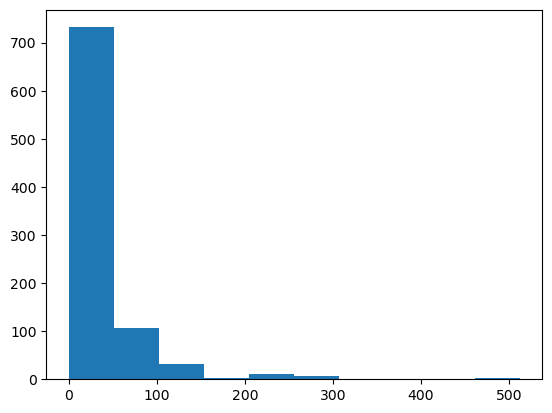

In [810]:
plt.hist(df['Fare'])
plt.show()

In [824]:
data_0 = df[df['Survived']==0]["Fare"] # 사망자 요금 데이터
data_1 = df[df['Survived']==1]["Fare"] # 생존자 요금 데이터

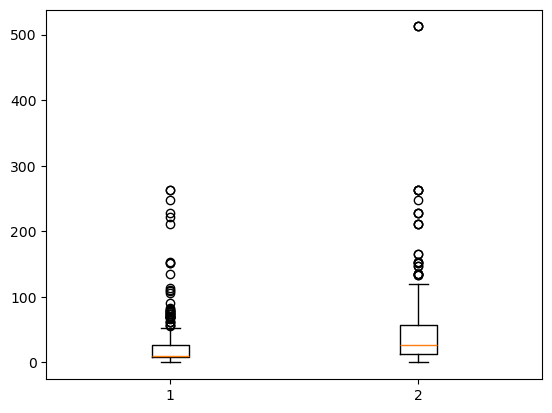

In [820]:
flg, ax = plt.subplots()
ax.boxplot([data_0,data_1])
plt.show()

In [933]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = [["철수",52],["영희",92],["미영",84],["시완",71],["미경",65],["영환",81],["숙경",66],["부영",77],["민섭",73],["보연",74]]
df = pd.DataFrame(data,columns=['이름','수학점수'])
df

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [935]:
df['수학점수'].mean()

73.5

In [937]:
np.mean(df['수학점수'])

73.5

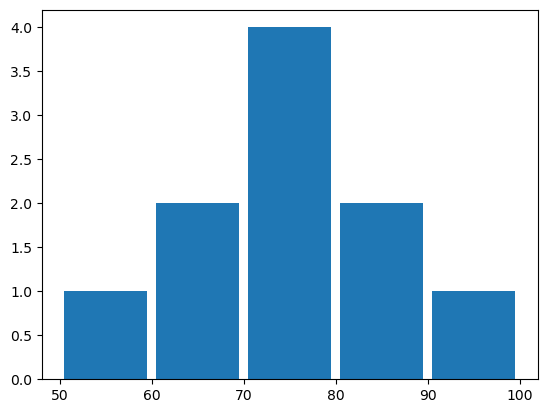

In [939]:
plt.hist(df['수학점수'],bins=5,range=[50,100],rwidth=0.9)
plt.show()

In [941]:
df['등급'] = ""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      10 non-null     object
 1   수학점수    10 non-null     int64 
 2   등급      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [943]:
df.loc[df["수학점수"]<60,"등급"] = "F"
df.loc[(df["수학점수"]>=60) &(df['수학점수']<70),'등급'] = "D"
df.loc[(df["수학점수"]>=70) &(df['수학점수']<80),'등급'] = "C"
df.loc[(df["수학점수"]>=80) &(df['수학점수']<90),'등급'] = "B"
df.loc[df["수학점수"]>=90,"등급"] = "A"

In [945]:
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


### cut
- 목적: 데이터를 특정 구간으로 나누고 싶을 때 사용합니다.
- 구간 정의: 사용자가 직접 정의한 구간을 기준으로 데이터를 나눕니다.
### qcut
- 목적: 데이터를 분위수(quantiles)로 나누고 싶을 때 사용합니다.
- 구간정의: 데이터의 분포에 따라 동일한 개수의 데이터 포인트가 포함되도록 구간을 자동으로 설정합니다/

In [948]:
df['등급2'] = pd.cut(df['수학점수'],bins=[0,60,70,80,90,100],labels=['F','D','C','B','A'])
df

,이름,수학점수,등급,등급2
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,B
3,시완,71,C,C
4,미경,65,D,D
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,C
8,민섭,73,C,C
9,보연,74,C,C


In [950]:
data =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
pd.cut(data,bins=3)

[(0.991, 4.0], (0.991, 4.0], (0.991, 4.0], (0.991, 4.0], (4.0, 7.0], (4.0, 7.0], (4.0, 7.0], (7.0, 10.0], (7.0, 10.0], (7.0, 10.0]]
Categories (3, interval[float64, right]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]

In [956]:
bins = [0, 3, 7, 10]
labels=['낮음','중간','높음']
pd.cut(data,bins=bins,labels=labels)

['낮음', '낮음', '낮음', '중간', '중간', '중간', '중간', '높음', '높음', '높음']
Categories (3, object): ['낮음' < '중간' < '높음']

In [962]:
pd.cut(data,
                bins=bins,
                labels=labels,
                include_lowest=True,
                right=False)

['낮음', '낮음', '중간', '중간', '중간', '중간', '높음', '높음', '높음', NaN]
Categories (3, object): ['낮음' < '중간' < '높음']

In [964]:
df['등급q'] = pd.qcut(df['수학점수'],q=5,labels=['F','D','C','B','A'])
df

,이름,수학점수,등급,등급2,등급q
0,철수,52,F,F,F
1,영희,92,A,A,A
2,미영,84,B,B,A
3,시완,71,C,C,D
4,미경,65,D,D,F
5,영환,81,B,B,B
6,숙경,66,D,D,D
7,부영,77,C,C,B
8,민섭,73,C,C,C
9,보연,74,C,C,C


In [966]:
scores = [25, 86, 91, 45, 70, 68, 55, 77, 82, 94, 30, 50, 60, 88, 89]
pd.qcut(scores, q=4)

[(24.999, 52.5], (70.0, 87.0], (87.0, 94.0], (24.999, 52.5], (52.5, 70.0], ..., (24.999, 52.5], (24.999, 52.5], (52.5, 70.0], (87.0, 94.0], (87.0, 94.0]]
Length: 15
Categories (4, interval[float64, right]): [(24.999, 52.5] < (52.5, 70.0] < (70.0, 87.0] < (87.0, 94.0]]

In [972]:
result3, bins =pd.qcut(scores, q=4, retbins=True)
print(f"Bins: {bins}")
result3

Bins: [25.  52.5 70.  87.  94. ]


[(24.999, 52.5], (70.0, 87.0], (87.0, 94.0], (24.999, 52.5], (52.5, 70.0], ..., (24.999, 52.5], (24.999, 52.5], (52.5, 70.0], (87.0, 94.0], (87.0, 94.0]]
Length: 15
Categories (4, interval[float64, right]): [(24.999, 52.5] < (52.5, 70.0] < (70.0, 87.0] < (87.0, 94.0]]

In [974]:
df['수학평가1'] = df['수학점수'].apply(lambda x: 'low' if x < 70 else 'high')
df

,이름,수학점수,등급,등급2,등급q,수학평가1
0,철수,52,F,F,F,low
1,영희,92,A,A,A,high
2,미영,84,B,B,A,high
3,시완,71,C,C,D,high
4,미경,65,D,D,F,low
5,영환,81,B,B,B,high
6,숙경,66,D,D,D,low
7,부영,77,C,C,B,high
8,민섭,73,C,C,C,high
9,보연,74,C,C,C,high
